# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Libraries and Definitions

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle

In [0]:
data_path = "./drive/My Drive/DSF/hw2/" # colab path

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'

To reduce memory usage, data types are defined in advance and while loading they are given as parameter. Basically, dataset is having higher (but not required) data types for most of the features so it takes lot of memory.

In [0]:
# inspired from this post: https://www.kaggle.com/mhviraf/reducing-memory-size-an-alternative
proper_dtypes = {'TransactionID': 'UInt32', 'isFraud': 'UInt8', 'TransactionDT': 'UInt32', 'card1': 'UInt16', 'card2': 'UInt16', 'card3': 'UInt8', 'card5': 'UInt8', 'addr1': 'UInt16', 'addr2': 'UInt8', 'dist1': 'UInt16', 'dist2': 'UInt16', 'C1': 'UInt16', 'C2': 'UInt16', 'C3': 'UInt8', 'C4': 'UInt16', 'C5': 'UInt16', 'C6': 'UInt16', 'C7': 'UInt16', 'C8': 'UInt16', 'C9': 'UInt16', 'C10': 'UInt16', 'C11': 'UInt16', 'C12': 'UInt16', 'C13': 'UInt16', 'C14': 'UInt16', 'D1': 'UInt16', 'D2': 'UInt16', 'D3': 'UInt16', 'D5': 'UInt16', 'D7': 'UInt16', 'D10': 'UInt16', 'D13': 'UInt16', 'V1': 'UInt8', 'V2': 'UInt8', 'V3': 'UInt8', 'V4': 'UInt8', 'V5': 'UInt8', 'V6': 'UInt8', 'V7': 'UInt8', 'V8': 'UInt8', 'V9': 'UInt8', 'V10': 'UInt8', 'V11': 'UInt8', 'V12': 'UInt8', 'V13': 'UInt8', 'V14': 'UInt8', 'V15': 'UInt8', 'V16': 'UInt8', 'V17': 'UInt8', 'V18': 'UInt8', 'V19': 'UInt8', 'V20': 'UInt8', 'V21': 'UInt8', 'V22': 'UInt8', 'V23': 'UInt8', 'V24': 'UInt8', 'V25': 'UInt8', 'V26': 'UInt8', 'V27': 'UInt8', 'V28': 'UInt8', 'V29': 'UInt8', 'V30': 'UInt8', 'V31': 'UInt8', 'V32': 'UInt8', 'V33': 'UInt8', 'V34': 'UInt8', 'V35': 'UInt8', 'V36': 'UInt8', 'V37': 'UInt8', 'V38': 'UInt8', 'V39': 'UInt8', 'V40': 'UInt8', 'V41': 'UInt8', 'V42': 'UInt8', 'V43': 'UInt8', 'V44': 'UInt8', 'V45': 'UInt8', 'V46': 'UInt8', 'V47': 'UInt8', 'V48': 'UInt8', 'V49': 'UInt8', 'V50': 'UInt8', 'V51': 'UInt8', 'V52': 'UInt8', 'V53': 'UInt8', 'V54': 'UInt8', 'V55': 'UInt8', 'V56': 'UInt8', 'V57': 'UInt8', 'V58': 'UInt8', 'V59': 'UInt8', 'V60': 'UInt8', 'V61': 'UInt8', 'V62': 'UInt8', 'V63': 'UInt8', 'V64': 'UInt8', 'V65': 'UInt8', 'V66': 'UInt8', 'V67': 'UInt8', 'V68': 'UInt8', 'V69': 'UInt8', 'V70': 'UInt8', 'V71': 'UInt8', 'V72': 'UInt8', 'V73': 'UInt8', 'V74': 'UInt8', 'V75': 'UInt8', 'V76': 'UInt8', 'V77': 'UInt8', 'V78': 'UInt8', 'V79': 'UInt8', 'V80': 'UInt8', 'V81': 'UInt8', 'V82': 'UInt8', 'V83': 'UInt8', 'V84': 'UInt8', 'V85': 'UInt8', 'V86': 'UInt8', 'V87': 'UInt8', 'V88': 'UInt8', 'V89': 'UInt8', 'V90': 'UInt8', 'V91': 'UInt8', 'V92': 'UInt8', 'V93': 'UInt8', 'V94': 'UInt8', 'V95': 'UInt16', 'V96': 'UInt16', 'V97': 'UInt16', 'V98': 'UInt8', 'V99': 'UInt8', 'V100': 'UInt8', 'V101': 'UInt16', 'V102': 'UInt16', 'V103': 'UInt16', 'V104': 'UInt8', 'V105': 'UInt8', 'V106': 'UInt8', 'V107': 'UInt8', 'V108': 'UInt8', 'V109': 'UInt8', 'V110': 'UInt8', 'V111': 'UInt8', 'V112': 'UInt8', 'V113': 'UInt8', 'V114': 'UInt8', 'V115': 'UInt8', 'V116': 'UInt8', 'V117': 'UInt8', 'V118': 'UInt8', 'V119': 'UInt8', 'V120': 'UInt8', 'V121': 'UInt8', 'V122': 'UInt8', 'V123': 'UInt8', 'V124': 'UInt8', 'V125': 'UInt8', 'V138': 'UInt8', 'V139': 'UInt8', 'V140': 'UInt8', 'V141': 'UInt8', 'V142': 'UInt8', 'V143': 'UInt16', 'V144': 'UInt8', 'V145': 'UInt16', 'V146': 'UInt8', 'V147': 'UInt8', 'V148': 'UInt8', 'V149': 'UInt8', 'V150': 'UInt16', 'V151': 'UInt8', 'V152': 'UInt8', 'V153': 'UInt8', 'V154': 'UInt8', 'V155': 'UInt8', 'V156': 'UInt8', 'V157': 'UInt8', 'V158': 'UInt8', 'V167': 'UInt16', 'V168': 'UInt16', 'V169': 'UInt8', 'V170': 'UInt8', 'V171': 'UInt8', 'V172': 'UInt8', 'V173': 'UInt8', 'V174': 'UInt8', 'V175': 'UInt8', 'V176': 'UInt8', 'V177': 'UInt16', 'V178': 'UInt16', 'V179': 'UInt16', 'V180': 'UInt8', 'V181': 'UInt8', 'V182': 'UInt8', 'V183': 'UInt8', 'V184': 'UInt8', 'V185': 'UInt8', 'V186': 'UInt8', 'V187': 'UInt8', 'V188': 'UInt8', 'V189': 'UInt8', 'V190': 'UInt8', 'V191': 'UInt8', 'V192': 'UInt8', 'V193': 'UInt8', 'V194': 'UInt8', 'V195': 'UInt8', 'V196': 'UInt8', 'V197': 'UInt8', 'V198': 'UInt8', 'V199': 'UInt8', 'V200': 'UInt8', 'V201': 'UInt8', 'V217': 'UInt16', 'V218': 'UInt16', 'V219': 'UInt16', 'V220': 'UInt8', 'V221': 'UInt16', 'V222': 'UInt16', 'V223': 'UInt8', 'V224': 'UInt8', 'V225': 'UInt8', 'V226': 'UInt16', 'V227': 'UInt16', 'V228': 'UInt8', 'V229': 'UInt16', 'V230': 'UInt16', 'V231': 'UInt16', 'V232': 'UInt16', 'V233': 'UInt16', 'V234': 'UInt16', 'V235': 'UInt8', 'V236': 'UInt8', 'V237': 'UInt8', 'V238': 'UInt8', 'V239': 'UInt8', 'V240': 'UInt8', 'V241': 'UInt8', 'V242': 'UInt8', 'V243': 'UInt8', 'V244': 'UInt8', 'V245': 'UInt16', 'V246': 'UInt8', 'V247': 'UInt8', 'V248': 'UInt8', 'V249': 'UInt8', 'V250': 'UInt8', 'V251': 'UInt8', 'V252': 'UInt8', 'V253': 'UInt8', 'V254': 'UInt8', 'V255': 'UInt8', 'V256': 'UInt8', 'V257': 'UInt8', 'V258': 'UInt16', 'V259': 'UInt16', 'V260': 'UInt8', 'V261': 'UInt8', 'V262': 'UInt8', 'V279': 'UInt16', 'V280': 'UInt16', 'V281': 'UInt8', 'V282': 'UInt8', 'V283': 'UInt8', 'V284': 'UInt8', 'V285': 'UInt8', 'V286': 'UInt8', 'V287': 'UInt8', 'V288': 'UInt8', 'V289': 'UInt8', 'V290': 'UInt8', 'V291': 'UInt16', 'V292': 'UInt16', 'V293': 'UInt16', 'V294': 'UInt16', 'V295': 'UInt16', 'V296': 'UInt8', 'V297': 'UInt8', 'V298': 'UInt8', 'V299': 'UInt8', 'V300': 'UInt8', 'V301': 'UInt8', 'V302': 'UInt8', 'V303': 'UInt8', 'V304': 'UInt8', 'V305': 'UInt8', 'V322': 'UInt16', 'V323': 'UInt16', 'V324': 'UInt16', 'V325': 'UInt8', 'V326': 'UInt8', 'V327': 'UInt8', 'V328': 'UInt8', 'V329': 'UInt8', 'V330': 'UInt8'}

## Load and Analysis Data

In [0]:
train_identity = pd.read_csv(data_path + 'train_identity.csv')

In [0]:
train_transaction = pd.read_csv(data_path + 'train_transaction.csv', dtype=proper_dtypes)

In [0]:
test_transaction = pd.read_csv(data_path + 'test_transaction.csv', dtype=proper_dtypes)

In [0]:
test_identity = pd.read_csv(data_path + 'test_identity.csv')

In [10]:
print("Train transaction", train_transaction.shape)
print("Train identity", train_identity.shape)
print("Test transaction", test_transaction.shape)
print("Test identity", test_identity.shape)

Train transaction (590540, 394)
Train identity (144233, 41)
Test transaction (506691, 393)
Test identity (141907, 41)


Here, there should be some data in train transaction which may not map to the train identity. So using left join to merge both dataframe on transaction Id column.

In [0]:
train_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_df = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
del train_transaction, train_identity, test_transaction, test_identity

In [12]:
print("train_df", train_df.shape)
print("test_df", test_df.shape)

train_df (590540, 434)
test_df (506691, 433)


That one extra column in train_df is "isFraud" which we want to predict in test_df

In [0]:
# non anonymous columns are the columns assignment document has mentioned
trans_non_anonymous_columns = [
    'TransactionID',
    'TransactionDT',
    'TransactionAmt',
    'ProductCD',
    'card4',
    'card6',
    'P_emaildomain',
    'R_emaildomain',
    'addr1',
    'addr2',
    'dist1',
    'dist2',
    'isFraud',
    'TransactionID',
    'DeviceType',
    'DeviceInfo'
]

train_df_known = train_df[trans_non_anonymous_columns]

**Data types used for each non anonymous columns**

In [14]:
train_df_known.dtypes

TransactionID      UInt32
TransactionDT      UInt32
TransactionAmt    float64
ProductCD          object
card4              object
card6              object
P_emaildomain      object
R_emaildomain      object
addr1              UInt16
addr2               UInt8
dist1              UInt16
dist2              UInt16
isFraud             UInt8
TransactionID      UInt32
DeviceType         object
DeviceInfo         object
dtype: object

**Columns having NaN values**

In [15]:
train_df_known.columns[train_df_known.isna().any()]

Index(['card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2',
       'dist1', 'dist2', 'DeviceType', 'DeviceInfo'],
      dtype='object')

So these are the columns having nan values.

**Statistical distribution of the dataframe for non anonymous columns**

In [16]:
# statistical distribution
train_df_known.describe(include='all')

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,isFraud,TransactionID,DeviceType,DeviceInfo
count,590540.000,590540.000,590540.000,590540,588963,588969,496084,137291,524834.000,524834.000,238269.000,37627.000,590540.000,590540.000,140810,118666
unique,nan,nan,nan,5,4,4,59,60,nan,nan,nan,nan,nan,nan,2,1786
top,nan,nan,nan,W,visa,debit,gmail.com,gmail.com,nan,nan,nan,nan,nan,nan,desktop,Windows
freq,nan,nan,nan,439670,384767,439938,228355,57147,nan,nan,nan,nan,nan,nan,85165,47722
mean,3282269.500,7372311.310,135.027,NaN,NaN,NaN,NaN,NaN,290.734,86.801,118.502,231.855,0.035,3282269.500,NaN,NaN
std,170474.358,4617223.647,239.163,NaN,NaN,NaN,NaN,NaN,101.741,2.691,371.872,529.053,0.184,170474.358,NaN,NaN
min,2987000.000,86400.000,0.251,NaN,NaN,NaN,NaN,NaN,100.000,10.000,0.000,0.000,0.000,2987000.000,NaN,NaN
25%,3134634.750,3027057.750,43.321,NaN,NaN,NaN,NaN,NaN,204.000,87.000,3.000,7.000,0.000,3134634.750,NaN,NaN
50%,3282269.500,7306527.500,68.769,NaN,NaN,NaN,NaN,NaN,299.000,87.000,8.000,37.000,0.000,3282269.500,NaN,NaN
75%,3429904.250,11246620.000,125.000,NaN,NaN,NaN,NaN,NaN,330.000,87.000,24.000,206.000,0.000,3429904.250,NaN,NaN


## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [0]:
# TODO: code and runtime results

# distributions of 
#     'TransactionDT',
#     'TransactionAmt',
#     'ProductCD',
#     'card4',
#     'card6',
#     'P_emaildomain',
#     'R_emaildomain',
#     'addr1',
#     'addr2',
#     'dist1',
#     'dist2',
#     'isFraud',
#     'TransactionID',
#     'DeviceType',
#     'DeviceInfo'

**fraud vs non fraud**

fraud data 20663 non_fraud data 569877


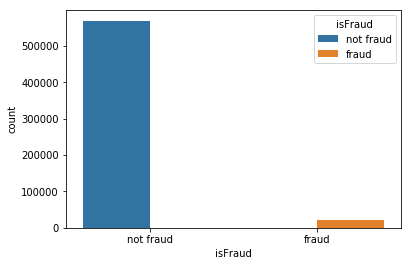

In [18]:
# separated fraud and non fraud data
fraud_df_known = train_df_known[train_df_known['isFraud'] == 1].drop('isFraud',1)
non_fraud_df_known = train_df_known[train_df_known['isFraud'] == 0].drop('isFraud',1)
print("fraud data",len(fraud_df_known), "non_fraud data",len(non_fraud_df_known))

temp_df = train_df_known.copy()
temp_df['isFraud'] = train_df_known['isFraud'].replace({1:'fraud', 0:'not fraud'})
sns.countplot(x = 'isFraud', data=temp_df, hue='isFraud')

So it is a biased distribution as fraud data is very less compared to non fraud.

**TransactionDT Distribution**

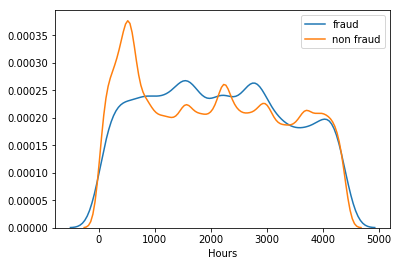

In [19]:
column = 'TransactionDT'
temp_df = train_df_known[[column, 'isFraud']]
temp_df[column] /= (60*60) # from seconds to hours

temp_df_f = temp_df[temp_df['isFraud'] == 1]
temp_df_nf = temp_df[temp_df['isFraud'] == 0]

sns.distplot(temp_df_f[column], label='fraud', hist=False)
# plt.legend()
# plt.show()

sns.distplot(temp_df_nf[column], label='non fraud', hist=False)
plt.legend()
plt.xlabel('Hours')
plt.show()

This says fraud transactions were 

**TransactionAmt Distribution**

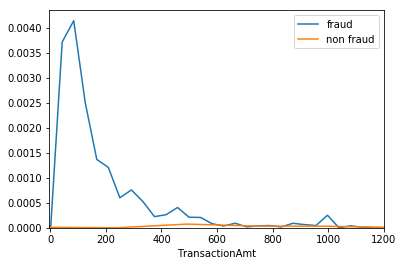

In [20]:
column = 'TransactionAmt'
temp_df = train_df_known[[column, 'isFraud']]

temp_df_f = temp_df[temp_df['isFraud'] == 1]
temp_df_nf = temp_df[temp_df['isFraud'] == 0]

fig, ax = plt.subplots()
sns.distplot(temp_df_f[column], label='fraud', hist=False)
ax.set_xlim(-5,2500)
# plt.legend()
# plt.show()

# fig, ax = plt.subplots()
sns.distplot(temp_df_nf[column], label='non fraud', hist=False)
ax.set_xlim(-5,1200)

plt.legend()
plt.show()

**ProductCD Distribution**

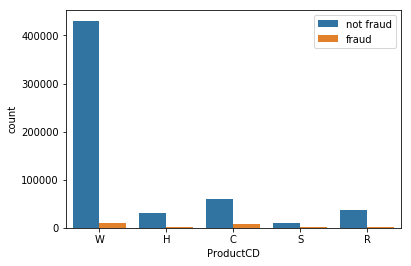

In [21]:
column = 'ProductCD'
temp_df = train_df_known[[column, 'isFraud']]

temp_df['isFraud'] = temp_df['isFraud'].replace({1:'fraud', 0:'not fraud'})

sns.countplot(x = column, data = temp_df, hue = 'isFraud')
plt.legend()

Products having code of W are purchased more and so having fradulent transactions more but at the same time having less transactions also product code C is getting significant amount of fraudulent transactions.

**card4 Distribution**

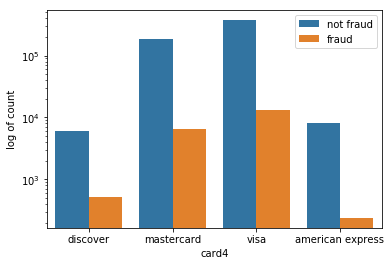

In [22]:
column = 'card4'
temp_df = train_df_known[[column, 'isFraud']]

temp_df['isFraud'] = temp_df['isFraud'].replace({1:'fraud', 0:'not fraud'})

ax = sns.countplot(x = column, data = temp_df, hue = 'isFraud')
ax.set(yscale = 'log')
plt.ylabel('log of count')
plt.legend()

Cards mastercard and visa covers majority of both data fraudlent and non fraudelnt. However discover card is having a good ratio of fraudulent and non fraudulent data compared american express card.

**card6 Distribution**

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64


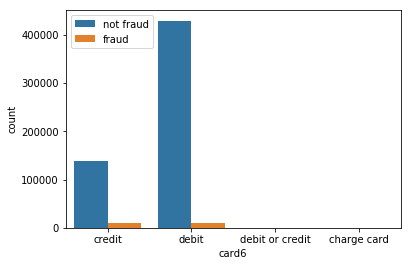

In [23]:
column = 'card6'
temp_df = train_df_known[[column, 'isFraud']]

temp_df['isFraud'] = temp_df['isFraud'].replace({1:'fraud', 0:'not fraud'})

print(temp_df[column].value_counts())

ax = sns.countplot(x = column, data = temp_df, hue = 'isFraud')
plt.legend()

Here 'debit or credit' and 'charge card' are having negligible data compared to other cards, so these both cards can be merged into a category called 'other cards' which may help while training because of having 1 less category.

**P_emaildomain Distribution**

count        496084
unique           59
top       gmail.com
freq         228355
Name: P_emaildomain, dtype: object


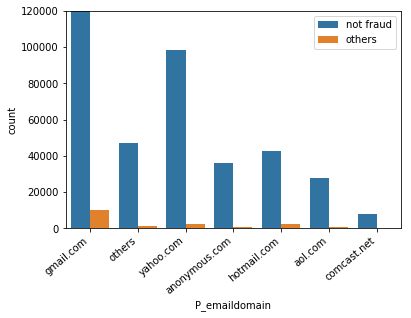

In [24]:
column = 'P_emaildomain'
temp_df = train_df_known[[column, 'isFraud']]

temp_df['isFraud'] = temp_df['isFraud'].replace({1:'fraud', 0:'not fraud'})

print(temp_df[column].describe())
temp_df = temp_df.apply(lambda x: x.mask(x.map(x.value_counts())<x.value_counts().mean()*0.9, 'others'))

ax = sns.countplot(x = column, data = temp_df, hue = 'isFraud')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylim(0,120000)

plt.legend()

This feature consists of many categories but data is centered to few categories only. So it is okay to merge less frequent categories as 'others'. However gmail is most frequent category here.

**R_emaildomain Distribution**

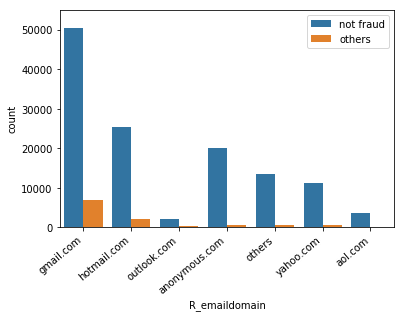

In [25]:
column = 'R_emaildomain'
temp_df = train_df_known[[column, 'isFraud']]

temp_df['isFraud'] = temp_df['isFraud'].replace({1:'fraud', 0:'not fraud'})

temp_df = temp_df.apply(lambda x: x.mask(x.map(x.value_counts())<x.value_counts().mean()*0.9, 'others'))

ax = sns.countplot(x = column, data = temp_df, hue = 'isFraud')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylim(0,55000)
plt.legend()

Same is done with P_emaildomain because of same reason and again gmail is surpassing other categories.

**addr1 Distribution**

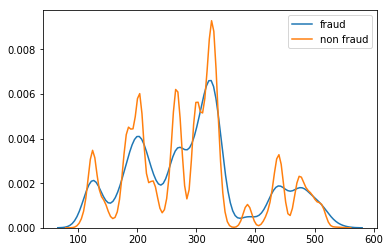

In [26]:
column = 'addr1'
temp_df = train_df_known[[column, 'isFraud']].dropna()
# temp_df[column] = temp_df[column].astype(np.uint8)

temp_df_f = temp_df[temp_df['isFraud'] == 1]
temp_df_nf = temp_df[temp_df['isFraud'] == 0]

fig, ax = plt.subplots()
sns.distplot(temp_df_f[column].tolist(), label='fraud', hist = False)
# ax.set_xlim(-5,1000)
# temp_df_f[column].hist(label='fraud')
# plt.legend()
# plt.show()

# fig, ax = plt.subplots()
sns.distplot(temp_df_nf[column].tolist(), label='non fraud', hist = False)
# ax.set_xlim(-5,2500)
plt.legend()
plt.show()

Both fraud and non fraud data looks quite similar distributed and whatever difference is there will be taken care by model.

**addr2 Distribution**

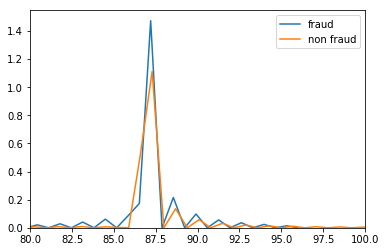

In [27]:
column = 'addr2'
temp_df = train_df_known[[column, 'isFraud']].dropna()
# temp_df[column] = temp_df[column].astype(np.uint8)

temp_df_f = temp_df[temp_df['isFraud'] == 1]
temp_df_nf = temp_df[temp_df['isFraud'] == 0]

fig, ax = plt.subplots()
sns.distplot(temp_df_f[column].tolist(), label='fraud', hist = False)
# ax.set_xlim(80,100)
# plt.legend()
# plt.show()

# fig, ax = plt.subplots()
sns.distplot(temp_df_nf[column].tolist(), label='non fraud', hist = False)
ax.set_xlim(80,100)
plt.legend()
plt.show()

Here also both fraud and non fraud categories looks similarly distributed however these distributions are suffereing from outliers.

**dist1 Distribution**

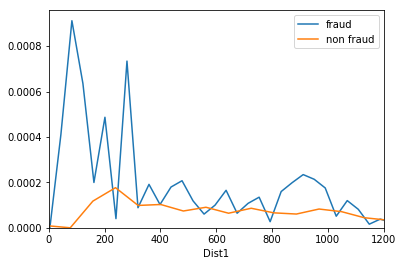

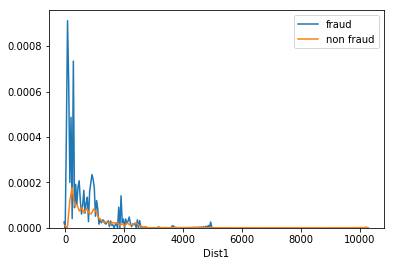

Fraud max 4942
Non Fraud max 10286


In [28]:
column = 'dist1'
temp_df = train_df_known[[column, 'isFraud']].dropna()
# temp_df[column] = temp_df[column].astype(np.uint8)

temp_df_f = temp_df[temp_df['isFraud'] == 1]
temp_df_nf = temp_df[temp_df['isFraud'] == 0]

fig, ax = plt.subplots()
sns.distplot(temp_df_f[column].tolist(), label='fraud', hist = False)
# ax.set_xlim(0,1200)
# plt.legend()
# plt.show()

# fig, ax = plt.subplots()
sns.distplot(temp_df_nf[column].tolist(), label='non fraud', hist = False)
ax.set_xlim(0,1200)
plt.legend()
plt.xlabel('Dist1')
plt.show()

fig, ax = plt.subplots()
sns.distplot(temp_df_f[column].tolist(), label='fraud', hist = False)

sns.distplot(temp_df_nf[column].tolist(), label='non fraud', hist = False)

plt.legend()
plt.xlabel('Dist1')
plt.show()

print('Fraud max',temp_df_f[column].max())
print('Non Fraud max',temp_df_nf[column].max())

I have added 2 distributions plots here both are of same data but because of outliers I have limited the view to some data in first plot. Both fraud and non fraud data are having outliers at 4942 and 10286 respectively. 

**dist2 Distribution**

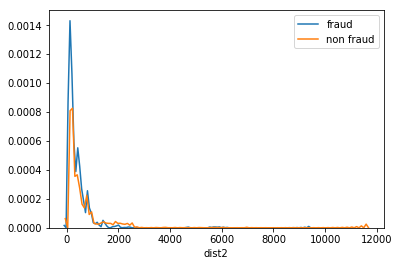

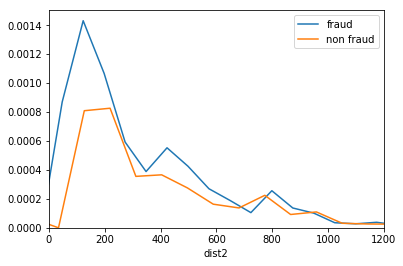

max of non fraud distribution 11623
mean of non fraud distribution 235.19975808354968


In [29]:
column = 'dist2'
temp_df = train_df_known[[column, 'isFraud']].dropna()
# temp_df[column] = temp_df[column].astype(np.uint8)

temp_df_f = temp_df[temp_df['isFraud'] == 1]
temp_df_nf = temp_df[temp_df['isFraud'] == 0]

fig, ax = plt.subplots()
sns.distplot(temp_df_f[column].tolist(), label='fraud', hist=False)
# ax.set_xlim(0,1200)
# plt.legend()
# plt.show()

# fig, ax = plt.subplots()
sns.distplot(temp_df_nf[column].tolist(), label='non fraud', hist=False)
# ax.set_xlim(0,1200)
plt.legend()
plt.xlabel('dist2')
plt.show()

fig, ax = plt.subplots()
sns.distplot(temp_df_f[column].tolist(), label='fraud', hist=False)
# ax.set_xlim(0,1200)
# plt.legend()
# plt.show()

# fig, ax = plt.subplots()
sns.distplot(temp_df_nf[column].tolist(), label='non fraud', hist=False)
ax.set_xlim(0,1200)
plt.legend()
plt.xlabel('dist2')
plt.show()


print("max of non fraud distribution", temp_df_nf[column].max())
print("mean of non fraud distribution", temp_df_nf[column].mean())

Both fraud and non fraud distributions are almost similar, but fraud is leading in begining so we can assume that in lower values of dist2, chances of fraudulent transactions will be higher so this can be a helpful feature while training. This distribution is also having outliers.

**DeviceType Distribution**

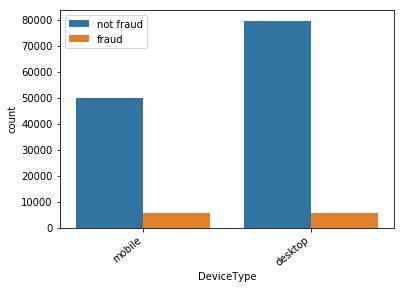

In [30]:
column = 'DeviceType'
temp_df = train_df_known[[column, 'isFraud']]

temp_df['isFraud'] = temp_df['isFraud'].replace({1:'fraud', 0:'not fraud'})

# temp_df = temp_df.apply(lambda x: x.mask(x.map(x.value_counts())<x.value_counts().mean()*0.9, 'others'))

ax = sns.countplot(x = column, data = temp_df, hue = 'isFraud')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.set_ylim(0,55000)
plt.legend()

 For fraud and non fraud categories, both mobile and desktop are somewhat equally distributed however dekstop leas in non fraud data with a good amount.

**DeviceInfo Distribution**

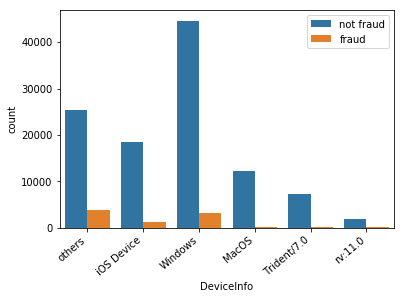

In [31]:
column = 'DeviceInfo'
temp_df = train_df_known[[column, 'isFraud']]

temp_df['isFraud'] = temp_df['isFraud'].replace({1:'fraud', 0:'not fraud'})

fifth_max = temp_df[column].value_counts().nlargest(5)[4]
temp_df = temp_df.apply(lambda x: x.mask(x.map(x.value_counts()) < fifth_max, 'others'))

ax = sns.countplot(x = column, data = temp_df, hue = 'isFraud')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.set_ylim(0,55000)
plt.legend()

This feature is having too many categories and average frequency value is also affected because of this. Other than top 5 most frequent categories are merged in others to show distribution.

## Part 2 - Transaction Frequency

spearman coefficient                 TransactionDT  TransactionAmt
TransactionDT           1.000           0.640
TransactionAmt          0.640           1.000
pearson coefficient                 TransactionDT  TransactionAmt
TransactionDT           1.000           0.651
TransactionAmt          0.651           1.000


<Figure size 432x288 with 0 Axes>

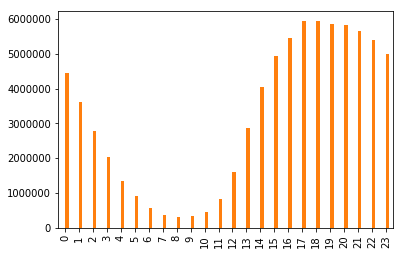

In [32]:
# TODO: code to generate the frequency graph

tempAddr2 = train_df['addr2'].dropna()
max_addr2 = tempAddr2.value_counts().idxmax()

temp = train_df[['TransactionDT','TransactionAmt','addr2']]
temp = temp[temp.addr2 == max_addr2]
temp = temp[['TransactionDT','TransactionAmt']]
temp['TransactionDT'] /= (60*60)
temp['TransactionDT'] = (temp['TransactionDT']%24).astype(np.uint8)
plt.figure()
df = temp.groupby(['TransactionDT'], as_index=False).sum()
df.plot(kind='bar', legend=None)

pearson_df = df.corr('pearson')
spearman_df = df.corr('spearman')

print('spearman coefficient', spearman_df)
print('pearson coefficient', pearson_df)

Using most frequenct country code, here is the distribution. Transaction frequency and hour of the day looks quite correlated. From the distributions, we can infer that from 10 to 18 which is a afternoon time Transaction frequency keeps on increasing and from evening to next day morning it keeps on decreasing. Most transactions are done in evening and night time only.

## Part 3 - Product Code

In [33]:
# TODO: code to analyze prices for different product codes

train_df[['TransactionAmt', 'ProductCD']].sort_values(['TransactionAmt'],ascending=True).drop_duplicates(['TransactionAmt']).groupby(['ProductCD']).head(5)

,TransactionAmt,ProductCD
374299,0.251,C
367961,0.272,C
205872,0.292,C
205393,0.350,C
492354,0.364,C
572465,1.000,W
62617,2.000,W
2759,3.500,W
116878,4.000,W
447596,4.970,W


R looks most expensive product code and C the cheapest product code.


For each transaction there is a product code assigned but transaction amount changes with each transaction. So one possibility is that each transaction is made to purchase product in bulk. So I grouped by product code and sorted by transaction amount. From this output we can assume the individual price of the product from difference of transaction amount as number of products will be  integer. Based on this, approximate individual prices of products can be guessed as followed: W: 1, R: 25, C: 0.02, S:1, H: 2.

## Part 4 - Correlation Coefficient

spearman coefficient                 TransactionDT  TransactionAmt
TransactionDT           1.000           0.630
TransactionAmt          0.630           1.000
pearson coefficient                 TransactionDT  TransactionAmt
TransactionDT           1.000           0.642
TransactionAmt          0.642           1.000


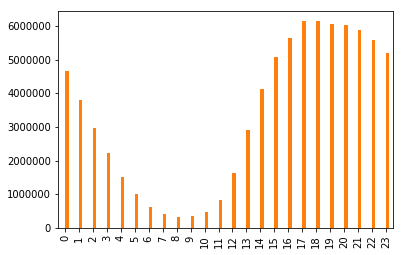

In [34]:
# TODO: code to calculate correlation coefficient
temp = train_df[['TransactionDT','TransactionAmt']]
temp['TransactionDT'] /= (60*60)
temp['TransactionDT'] = (temp['TransactionDT']%24).astype(np.uint8)
df = temp.groupby(['TransactionDT'], as_index=False).sum()
df.plot(kind='bar', legend=None)

pearson_df = df.corr('pearson')
spearman_df = df.corr('spearman')

print('spearman coefficient', spearman_df)
print('pearson coefficient', pearson_df)

Both spearman and pearson coefficients are 0.6 which means transaction amount is highly correlated with time in the day.

## Part 5 - Interesting Plot

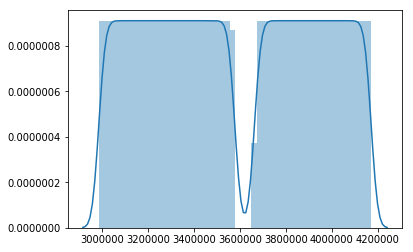

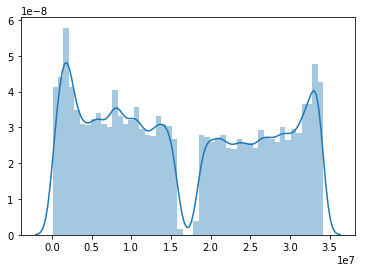

In [35]:
# TODO: code to generate the plot here.

col = 'TransactionID'
merged = pd.concat([train_df[col], test_df[col]])
sns.distplot(merged.tolist())
plt.show()
col = 'TransactionDT'
merged = pd.concat([train_df[col], test_df[col]])
sns.distplot(merged.tolist())
plt.show()

When I saw that all transaction ids are continuous in train data, I also checked in test data. Both of them were having continous data. During working on the assignment, it was easier to notice that transactionDT i.e. time reference was also continuous. Not only that there was just a small gap between train data and test data. Both of them are having continuous 6 month data. This reason made me assume that transactionDT feature should not be considered in training but it didn't improve performance, may be there will be some inter connection that I may have missed but overall I found it interesting.

**Dropping some data**

In [0]:
drop_cols = train_df.columns[train_df.isna().sum()/len(train_df) > 0.6].tolist()

These are the features having more than 60% nan values, so need to drop them.

In [0]:
train_df = train_df.drop(drop_cols,1)
test_df = test_df.drop(drop_cols,1)

In [38]:
print("final train columns", len(train_df.columns.tolist()))
print("final test columns", len(train_df.columns.tolist()))
print("difference", set(train_df.columns) - set(test_df.columns))

final train columns 226
final test columns 226
difference {'isFraud'}


**FILL nan values**

In [0]:
for col in train_df.columns[train_df.dtypes != object]:
  train_df[col] = train_df[col].fillna(0)
for col in train_df.columns[train_df.dtypes == object]:
  train_df[col] = train_df[col].fillna('nan')  
  
  
for col in test_df.columns[test_df.dtypes != object]:
  test_df[col] = test_df[col].fillna(0)
for col in test_df.columns[test_df.dtypes == object]:
  test_df[col] = test_df[col].fillna('nan')  

**ENCODE**

categorical features

In [40]:
train_df.loc[:,train_df.dtypes == object].columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

These are the features having categorical data which should be encoded.

In [0]:
dummies_cols =  list(train_df.loc[:,train_df.dtypes == object].columns)
# dummies_cols.append('addr2')

In [42]:
train_df['train'] = 1
test_df['train'] = 0
merged_df = pd.concat([train_df, test_df])
del train_df, test_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


Merging train and test data before encoding because there can be some categories in test dataframe which train dataframe does not have, rather than keeping it as unknown data.

In [0]:
merged_df_d = pd.get_dummies(merged_df, columns = dummies_cols)

In [44]:
train_df_d = merged_df_d[merged_df_d['train'] == 1]


print(train_df_d.columns)
train_df_d = train_df_d.drop(['train'],1)

test_df_d = merged_df_d[merged_df_d['train'] == 0]
test_df_d = test_df_d.drop(['train','isFraud'],1)
# print(test_df_d.columns['train'])

del merged_df_d

Index(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C3', 'C4', 'C5',
       ...
       'addr2_93', 'addr2_94', 'addr2_95', 'addr2_96', 'addr2_97', 'addr2_98',
       'addr2_99', 'addr2_100', 'addr2_101', 'addr2_102'],
      dtype='object', length=410)


In [45]:
print("final train columns", len(train_df_d.columns.tolist()))
print("final test columns", len(test_df_d.columns.tolist()))
print("difference", set(train_df_d.columns) - set(test_df_d.columns))

final train columns 409
final test columns 408
difference {'isFraud'}


In [46]:
pred_column = 'isFraud'
features = set(train_df_d.columns) - set([pred_column])
print(features)

{'V119', 'M4_M1', 'addr2_30', 'V43', 'P_emaildomain_gmail', 'addr2_90', 'V10', 'D3', 'V312', 'V131', 'M4_nan', 'V103', 'V23', 'V104', 'V67', 'V47', 'V28', 'V132', 'card4_visa', 'addr2_14', 'V41', 'M3_nan', 'V45', 'P_emaildomain_windstream.net', 'addr2_74', 'V302', 'V303', 'P_emaildomain_hotmail.de', 'M3_F', 'addr2_65', 'V88', 'P_emaildomain_cableone.net', 'V307', 'addr2_45', 'C2', 'V30', 'V319', 'C10', 'addr2_26', 'addr2_67', 'V95', 'V90', 'V110', 'addr2_33', 'P_emaildomain_juno.com', 'V77', 'V86', 'M9_T', 'P_emaildomain_yahoo.co.jp', 'V107', 'addr2_79', 'addr2_53', 'P_emaildomain_ymail.com', 'V39', 'V128', 'addr2_95', 'M5_T', 'M8_nan', 'addr2_94', 'P_emaildomain_yahoo.de', 'V24', 'addr2_17', 'addr2_80', 'V294', 'addr2_71', 'addr2_93', 'addr2_84', 'V69', 'V20', 'P_emaildomain_aol.com', 'V288', 'V305', 'P_emaildomain_optonline.net', 'V37', 'V113', 'addr2_13', 'P_emaildomain_embarqmail.com', 'V123', 'V279', 'P_emaildomain_att.net', 'V15', 'V97', 'V68', 'V320', 'P_emaildomain_frontier.com

## Part 6 - Prediction Model

In [0]:
# TODO: code for your final model

**K fold Cross Validation**

In [48]:
x,y = train_df_d[features], train_df_d[pred_column]

print("Final train data: ",x.shape, y.shape)

folds = KFold(n_splits=3, shuffle=True)
results = []

for fold_index, (train_idx, val_idx) in enumerate(folds.split(x, y)):
    
    print("Fold->", fold_index)
    
    train_x, train_y = x.iloc[train_idx,:], y[train_idx].astype(np.uint8)    
    val_x, val_y = x.iloc[val_idx,:], np.array(y[val_idx]).astype(np.uint8)

#     Linear regression
    reg = LinearRegression()   
    model = reg.fit(train_x, train_y)
    pred_y = model.predict(val_x)
    
    results.append(metrics.roc_auc_score(val_y, pred_y))

print('AUC score', np.mean(results))

Final train data:  (590540, 408) (590540,)
Fold-> 0
Fold-> 1
Fold-> 2
AUC score 0.8211538544399662


**Training**

In [49]:
x,y = train_df_d[features], train_df_d[pred_column]

print("Final train data: ",x.shape, y.shape)

# Linear regression
reg = LinearRegression()   
model = reg.fit(x,y)


Final train data:  (590540, 408) (590540,)


**Predicting on test data**

In [50]:
transaction_ids = test_df_d['TransactionID']
print("final test data: ", test_df_d.shape)

filename = data_path + 'results/'+ 'pred2.csv'
# model = pickle.load(open(data_path + 'models/'+ 'logReg.sav', 'rb'))

pred_y = model.predict(test_df_d)

print('output rows', pred_y.shape) # 506691 
# pred_y.to_csv(filename, sep='\t')


pred_data = {'TransactionID': transaction_ids, 'isFraud':pred_y}
df = pd.DataFrame(pred_data)
df.to_csv(filename, index = False)

final test data:  (506691, 408)
output rows (506691,)


After dropping some features and filling up nan values and encoding categorical columns, I tried few model trainings. I used K fold cross validation to measure performance initially with fewer data and when performance looked satisfied, increased features and eventually figured out linear regression model performing well. Still there are some features like card1,card2,card3 and card5 I found highly dependednt to each other which I could use to fill up the nan values. As there are very large amount of nan values in anonymous features I had to drop them directly instead of using them with a higher complex model and make use of high dimentional data.

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/karanshahstonybrook

Highest Rank: 5091

Score: 0.8639

Number of entries: 2

INCLUDE IMAGE OF YOUR KAGGLE RANKING!
<img src="https://drive.google.com/uc?export=view&id=16OKm-UWWswK1qh8QljzhuLAliOQqF_BM">